In [1]:
%matplotlib inline
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
seaborn.set_context({"figure.figsize": (12, 8)})
specieslist = ['Scer', 'Cele', 'Crei', 'Mtru', 'Dmel', 'Dpul', 'Agam',
               'Xtro', 'Drer', 'Mmus', 'Hsap']

In [2]:
def draw_plot(data, series, groupby, ptype='box', order=None,
              xlabel=None, ylabel=None, ylim=None, yticks=None,
              yticklabs=None, palette=None):
    plotfunc = {'violin': seaborn.violinplot,
                'box': seaborn.boxplot}[ptype]
    plot = plotfunc(x=groupby, y=series, data=data, order=order,
                    palette=palette)

    if xlabel is not None:
        _ = plot.set_xlabel(xlabel)
    if ylabel is not None:
        _ = plot.set_ylabel(ylabel)
    if yticks is not None:
        _ = plot.set_yticks(yticks)
    if yticklabs is not None:
        _ = plot.set_yticklabels(yticklabs)
    if ylim:
        plot.set_ylim(ylim[0], ylim[1])
    
    # Cleanup
    seaborn.despine(left=True)
    _ = matplotlib.pyplot.title("")
    _ = matplotlib.pyplot.suptitle("")
    #_ = matplotlib.pyplot.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [3]:
def load_data(pattern, loglength=True):
    filelist = glob.glob(pattern)
    data = pandas.concat([pandas.read_table(f) for f in filelist])
    if loglength:
        data['LogLength'] = numpy.log10(data['Length'])
    return data

In [4]:
iloci = load_data('species/*/*.iloci.tsv')
siloci = iloci[iloci['LocusClass'] == 'siLocus']
iiloci = iloci[iloci['LocusClass'] == 'iiLocus']

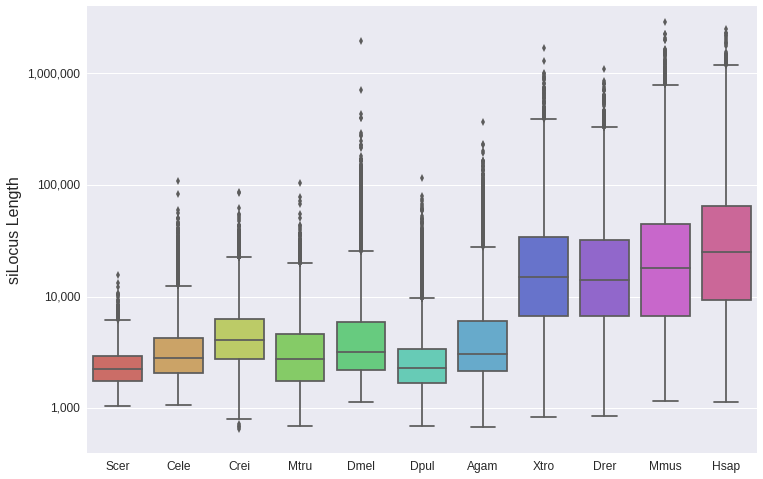

In [5]:
draw_plot(siloci, 'LogLength', 'Species', xlabel='', ylabel='siLocus Length', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)),
          ylim=(2.6, 6.6), yticks=(2, 3, 4, 5, 6), yticklabs=('100', '1,000', '10,000', '100,000', '1,000,000'))

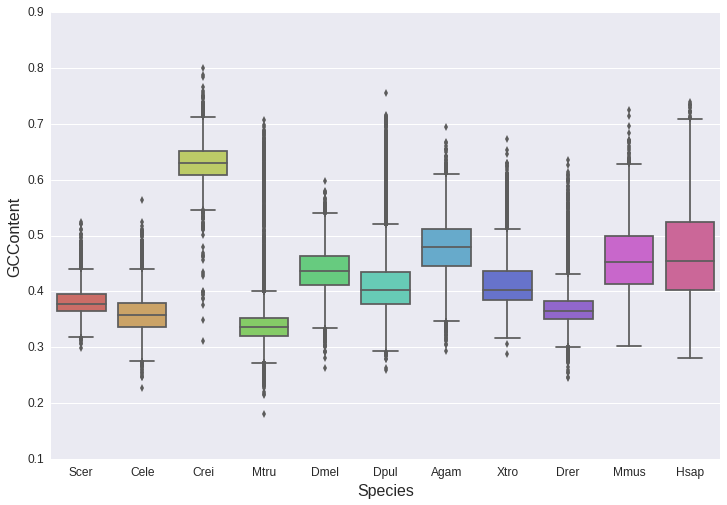

In [6]:
draw_plot(siloci, 'GCContent', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)))

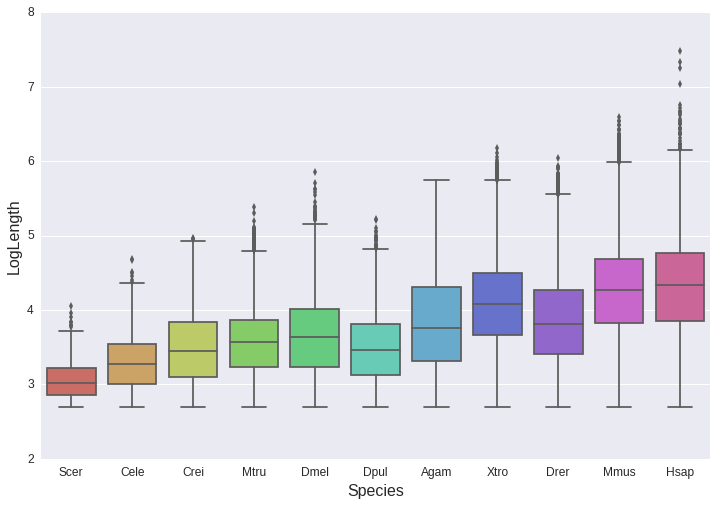

In [7]:
draw_plot(iiloci, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)))

In [8]:
premrnas = load_data('species/*/*.pre-mrnas.tsv')

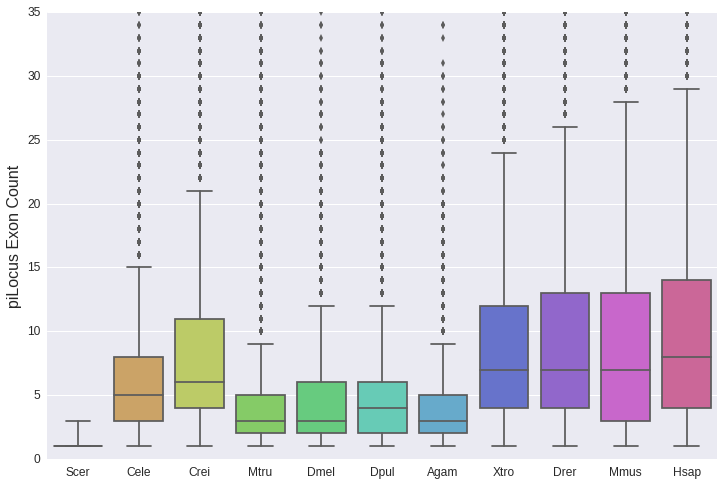

In [9]:
draw_plot(premrnas, 'ExonCount', 'Species', xlabel='', ylabel='piLocus Exon Count',
          order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)), ylim=(0, 35))

In [10]:
single_exon_genes = premrnas[premrnas['ExonCount'] == 1].groupby('Species').size()
all_genes = premrnas.groupby('Species').size()
single_exon_genes / all_genes * 100

Species
Agam     9.240897
Cele     2.873164
Crei     7.883324
Dmel    15.441066
Dpul    16.505520
Drer     4.078184
Grai    15.276711
Hsap     6.526543
Mmus    10.818101
Mtru    22.759892
Pdom     3.929188
Scer    95.426303
Vcar     7.546908
Xtro     6.232725
dtype: float64

In [11]:
all_genes

Species
Agam    12304
Cele    20152
Crei    14296
Dmel    13354
Dpul    30614
Drer    26041
Grai    35145
Hsap    19459
Mmus    21501
Mtru    50444
Pdom    11580
Scer     5794
Vcar    14390
Xtro    21708
dtype: int64

In [12]:
single_exon_genes

Species
Agam     1137
Cele      579
Crei     1127
Dmel     2062
Dpul     5053
Drer     1062
Grai     5369
Hsap     1270
Mmus     2326
Mtru    11481
Pdom      455
Scer     5529
Vcar     1086
Xtro     1353
dtype: int64

In [41]:
milocus_data = load_data('species/*/*.miloci.tsv')
miloci = milocus_data.loc[(milocus_data.LocusClass == 'miLocus')]
singletons = milocus_data.loc[(milocus_data.LocusClass.isin(['siLocus', 'ciLocus']))]

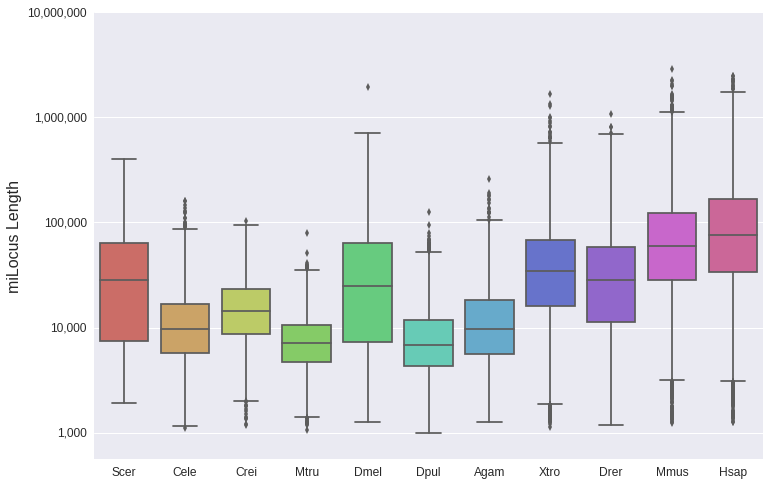

In [40]:
draw_plot(miloci, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)),
          xlabel='', ylabel='miLocus Length', ylim=(2.75, 7), yticks=(3, 4, 5, 6, 7),
          yticklabs=('1,000', '10,000', '100,000', '1,000,000', '10,000,000'))

In [56]:
singleton_locuspos = [lp[6:-1] for lp in singletons['LocusPos']]
milocus_siloci = siloci.loc[~(siloci.LocusPos.isin(singleton_locuspos))]

In [61]:
for locusset in (milocus_siloci, singletons):
    for prop in ['Length', 'GCContent']:
        print(locusset.groupby('Species')[prop].median())
        #average = '{:.2f}'.format(locusset[prop].mean())
        #quantiles = ['{:.4f}'.format(q) for q in locusset[prop].quantile([0.25, 0.5, 0.75])]
        #print(average, *quantiles)

Species
Agam     2799.0
Cele     2835.0
Crei     4209.5
Dmel     3180.0
Dpul     2403.0
Drer    12855.0
Grai     4047.0
Hsap    28412.0
Mmus    22418.0
Mtru     2839.0
Pdom     3585.0
Scer     2230.0
Vcar     5010.0
Xtro    13954.0
Name: Length, dtype: float64
Species
Agam    0.482
Cele    0.357
Crei    0.628
Dmel    0.439
Dpul    0.399
Drer    0.362
Grai    0.352
Hsap    0.460
Mmus    0.468
Mtru    0.338
Pdom    0.283
Scer    0.378
Vcar    0.558
Xtro    0.406
Name: GCContent, dtype: float64
Species
Agam     3673.0
Cele     2854.5
Crei     3757.0
Dmel     2990.0
Dpul     2059.0
Drer    15185.0
Grai     3593.0
Hsap    21329.0
Mmus    14557.5
Mtru     2677.0
Pdom     4507.0
Scer     2173.0
Vcar     4628.5
Xtro    15404.0
Name: Length, dtype: float64
Species
Agam    0.4760
Cele    0.3550
Crei    0.6360
Dmel    0.4240
Dpul    0.4140
Drer    0.3650
Grai    0.3500
Hsap    0.4460
Mmus    0.4380
Mtru    0.3350
Pdom    0.3060
Scer    0.3875
Vcar    0.5580
Xtro    0.4010
Name: GCContent, dtype: 

In [59]:
print(milocus_siloci.loc[milocus_siloci.Species == 'Mtru'].size)
print(singletons.loc[singletons.Species == 'Mtru'].size)

299325
356447


In [15]:
introns = load_data('species/*/*.introns.tsv')

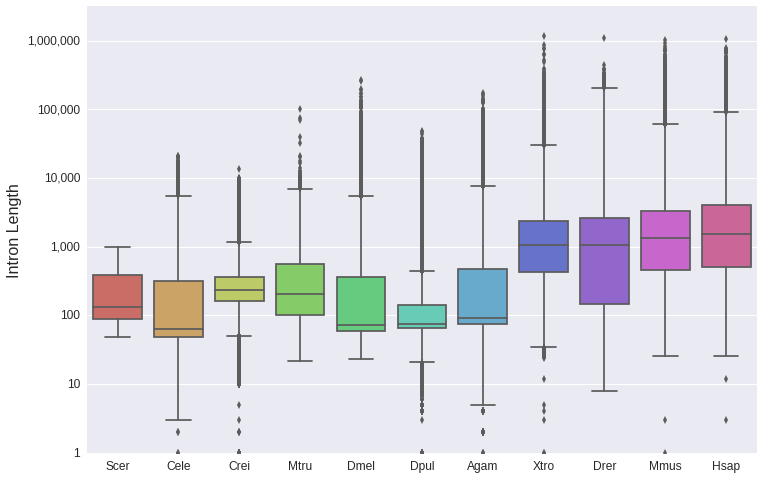

In [16]:
draw_plot(introns, 'LogLength', 'Species', xlabel='', ylabel='Intron Length',
          order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)),
          ylim=(0, 6.5), yticks=(0, 1, 2, 3, 4, 5, 6),
          yticklabs=('1', '10', '100', '1,000', '10,000', '100,000', '1,000,000'))
          #yticklabs=('1e0', '1e1', '1e2', '1e3', '1e4', '1e5', '1e6'))

In [17]:
introns.loc[(introns.Species == 'Dpul')]['Length'].mean()

282.66578023521151

In [18]:
introns.loc[(introns.Species == 'Dpul')]['Length'].median()

75.0

In [19]:
introns.loc[(introns.Species == 'Dpul')]['Length'].size

113940

In [20]:
introns.loc[(introns.Species == 'Dmel')]['Length'].mean()

1211.4246652161235

In [21]:
introns.loc[(introns.Species == 'Dmel')]['Length'].median()

72.0

In [22]:
introns.loc[(introns.Species == 'Dmel')]['Length'].size

44581

In [23]:
exons = load_data('species/*/*.exons.tsv')

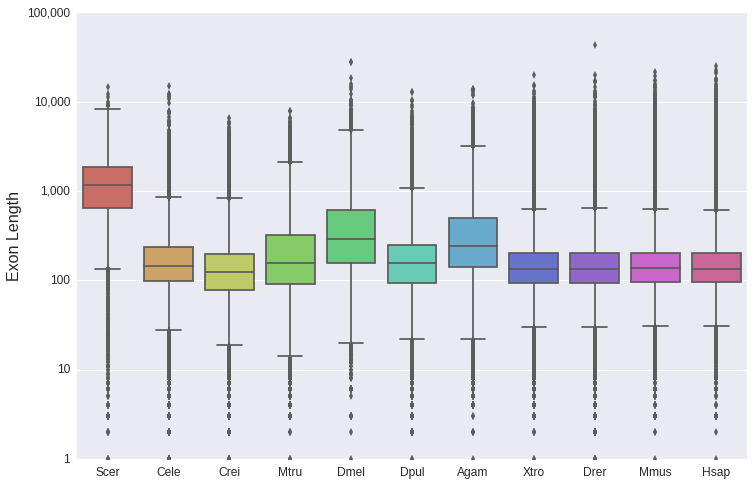

In [24]:
draw_plot(exons, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)),
          xlabel='', ylabel='Exon Length', yticks=(0, 1, 2, 3, 4, 5),
          yticklabs=('1', '10', '100', '1,000', '10,000', '100,000'))

In [25]:
exons.loc[(exons.Species == 'Dpul')]['Length'].mean()

227.10658300704236

In [26]:
exons.loc[(exons.Species == 'Dpul')]['Length'].median()

154.0

In [27]:
exons.loc[(exons.Species == 'Dpul')]['Length'].size

144554

In [28]:
exons.loc[(exons.Species == 'Dmel')]['Length'].mean()

514.22093867810327

In [29]:
exons.loc[(exons.Species == 'Dmel')]['Length'].median()

286.0

In [30]:
exons.loc[(exons.Species == 'Dmel')]['Length'].size

57826

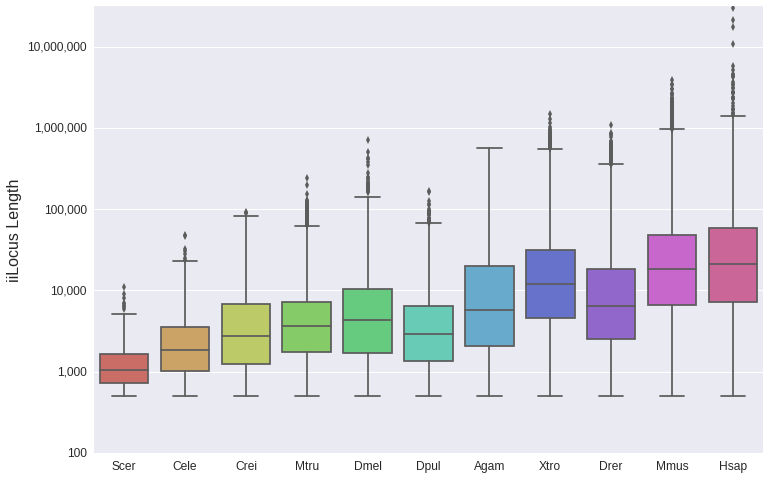

In [31]:
draw_plot(iiloci, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)),
          xlabel='', ylabel='iiLocus Length', ylim=(2, 7.5), yticks=(2, 3, 4, 5, 6, 7),
          yticklabs=('100', '1,000', '10,000', '100,000', '1,000,000', '10,000,000'))

In [32]:
iiloci.loc[(iiloci.Species == 'Dpul')]['Length'].mean()

5756.4697364388603

In [33]:
iiloci.loc[(iiloci.Species == 'Dpul')]['Length'].median()

2899.0

In [34]:
iiloci.loc[(iiloci.Species == 'Dmel')]['Length'].mean()

10333.595168800932

In [35]:
iiloci.loc[(iiloci.Species == 'Dmel')]['Length'].median()

4275.0

In [36]:
premrnas.loc[(premrnas.Species == 'Dpul')]['ExonCount'].mean()

4.7218266152740576

In [37]:
premrnas.loc[(premrnas.Species == 'Dpul')]['ExonCount'].median()

4.0

In [38]:
premrnas.loc[(premrnas.Species == 'Dmel')]['ExonCount'].mean()

4.3687284708701517

In [39]:
premrnas.loc[(premrnas.Species == 'Dmel')]['ExonCount'].median()

3.0